# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Example-Data" data-toc-modified-id="Example-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example Data</a></div><div class="lev1 toc-item"><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></div><div class="lev1 toc-item"><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fitting the model</a></div><div class="lev2 toc-item"><a href="#F-statistics" data-toc-modified-id="F-statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>F-statistics</a></div><div class="lev2 toc-item"><a href="#Log-Likelihood" data-toc-modified-id="Log-Likelihood-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Log-Likelihood</a></div><div class="lev2 toc-item"><a href="#AIC-and-BIC" data-toc-modified-id="AIC-and-BIC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>AIC and BIC</a></div><div class="lev2 toc-item"><a href="#Coefficients" data-toc-modified-id="Coefficients-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Coefficients</a></div><div class="lev2 toc-item"><a href="#t-statistic" data-toc-modified-id="t-statistic-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>t-statistic</a></div><div class="lev2 toc-item"><a href="#Standard-Error" data-toc-modified-id="Standard-Error-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Standard Error</a></div><div class="lev2 toc-item"><a href="#Confidence-Interval" data-toc-modified-id="Confidence-Interval-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Confidence Interval</a></div><div class="lev2 toc-item"><a href="#Skewness-and-Kurtosis" data-toc-modified-id="Skewness-and-Kurtosis-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Skewness and Kurtosis</a></div><div class="lev2 toc-item"><a href="#Omnibus-Test" data-toc-modified-id="Omnibus-Test-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Omnibus Test</a></div><div class="lev2 toc-item"><a href="#Durbin-Watson" data-toc-modified-id="Durbin-Watson-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Durbin-Watson</a></div><div class="lev2 toc-item"><a href="#Jarque-Bera-Test" data-toc-modified-id="Jarque-Bera-Test-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Jarque-Bera Test</a></div><div class="lev2 toc-item"><a href="#Condition-Number" data-toc-modified-id="Condition-Number-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Condition Number</a></div><div class="lev2 toc-item"><a href="#R-squared" data-toc-modified-id="R-squared-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>R-squared</a></div><div class="lev2 toc-item"><a href="#Adjusted-R-squared" data-toc-modified-id="Adjusted-R-squared-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Adjusted R-squared</a></div><div class="lev1 toc-item"><a href="#Plot-the-data-and-fit" data-toc-modified-id="Plot-the-data-and-fit-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot the data and fit</a></div><div class="lev1 toc-item"><a href="#Fit-diagnostiscs" data-toc-modified-id="Fit-diagnostiscs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fit diagnostiscs</a></div><div class="lev2 toc-item"><a href="#A-look-at-the-residuals" data-toc-modified-id="A-look-at-the-residuals-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>A look at the residuals</a></div><div class="lev2 toc-item"><a href="#Cooks-distance" data-toc-modified-id="Cooks-distance-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cooks distance</a></div><div class="lev2 toc-item"><a href="#Statsmodels-builtin-plots" data-toc-modified-id="Statsmodels-builtin-plots-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Statsmodels builtin plots</a></div>

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

# Example Data

The **whiteside** dataset from R package MASS. It contains: the weekly gas consumption and average external temperature at a house in south-east England for two heating seasons, one of 26 weeks before, and one of 30 weeks after cavity-wall insulation was installed.

# Read Data

In [2]:
whiteside = pd.read_csv("whiteside.csv")
whiteside.head(5)

,Unnamed: 0,Insul,Temp,Gas
0,1,Before,-0.8,7.2
1,2,Before,-0.7,6.9
2,3,Before,0.4,6.4
3,4,Before,2.5,6.0
4,5,Before,2.9,5.8


# Fitting the model

Let’s see what the relationship between the gas consumption and the temprature is before the insulation

In [3]:
model = sm.ols(formula='Gas ~ Temp', data=whiteside, subset = whiteside['Insul']=="Before")
fitted = model.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    Gas   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     403.1
Date:                Sun, 07 Aug 2016   Prob (F-statistic):           1.64e-16
Time:                        22:28:50   Log-Likelihood:                -2.8783
No. Observations:                  26   AIC:                             9.757
Df Residuals:                      24   BIC:                             12.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.8538      0.118     57.876      0.0

## F-statistics

- The null hypothesis of the F-test is that the data can be modeled accurately by setting the regression coefficients to zero.   
- The alternative hypothesis is that at least one of the regression coefficients should be non-zero. 

If the F-distribution provides a p-value that is lower than some threshold , then we reject the null hypothesis, and and say that our model is, in fact, “doing something with its life.” 

In [4]:
fitted.fvalue

403.10760179665471

In [5]:
fitted.f_pvalue

1.6404687152856934e-16

## Log-Likelihood

In [6]:
N = fitted.nobs
SSR = fitted.ssr
s2 = SSR / N
L = (1.0 / np.sqrt(2 * np.pi * s2)) ** N * np.exp(-SSR / (s2 * 2.0))
np.log(L)

-2.8782923384182699

In [7]:
fitted.llf

-2.8782923384182695

## AIC and BIC

The Akaike information criterion (AIC) and the Bayesian information criterion (BIC) are based on the log-likelihood. Both measures introduce a penalty for model complexity, but the AIC penalizes complexity less severely than the BIC. **Both measures are only used when trying to decide between different models**. Choose the model that had the lower AIC or BIC value.

In [8]:
k = 2 # the number of parameters: slope and intercept
aic = 2 * k - 2 * np.log(L)
bic = k * np.log(N) - 2 * np.log(L)
print("aic = {}\nbic = {}".format(aic, bic))

aic = 9.75658467684
bic = 12.2727777529


In [9]:
fitted.aic

9.756584676836539

In [10]:
fitted.bic

12.272777752879502

## Coefficients

In [11]:
fitted.params

Intercept    6.853828
Temp        -0.393239
dtype: float64

## t-statistic

The statistic is given by the ratio of the coefficient (or factor) of the predictor variable of interest, and its corresponding standard error.  

In [12]:
fitted.tvalues

Intercept    57.875615
Temp        -20.077540
dtype: float64

In [13]:
fitted.pvalues

Intercept    2.717533e-27
Temp         1.640469e-16
dtype: float64

## Standard Error

In [14]:
SE = fitted.params / fitted.tvalues
SE

Intercept    0.118423
Temp         0.019586
dtype: float64

## Confidence Interval

In [15]:
def get_ci(fitted, SE, i=0):
    # the estimated coefficient, and its variance 
    beta, c = fitted.params[i], SE[i] 

    # critical value of the t-statistic 
    N = fitted.nobs
    P = fitted.df_model
    dof = N - P - 1
    z = scipy.stats.t( dof ).ppf(0.975) 

    # the confidence interval 
    print(beta - z * c, beta + z * c)

In [16]:
get_ci(fitted, SE, 0)

(6.6094137926823855, 7.0982416053546853)


In [17]:
get_ci(fitted, SE, 1)

(-0.43366235273559578, -0.35281529175731513)


In [18]:
fitted.conf_int()

,0,1
Intercept,6.609414,7.098242
Temp,-0.433662,-0.352815


## Skewness and Kurtosis

Skew and kurtosis refer to the shape of a (normal) distribution. Skewness is a measure of the asymmetry of a distribution, and kurtosis is a measure of its curvature, specifically how peaked the curve is.

In [19]:
d = whiteside.Gas - fitted.fittedvalues 
S = np.mean(d**3.0) / np.mean(d**2.0)**(3.0/2.0) 
K = np.mean(d**4.0) / np.mean(d**2.0)**(4.0/2.0) 
print('Skewness = {:.3f}\nKurtosis = {:.3f}'.format(S, K))

Skewness = -0.177
Kurtosis = 2.839


## Omnibus Test

The Omnibus test uses skewness and kurtosis to **test the null hypothesis that a distribution is normal**. In this case, we’re looking at the distribution of the residual. If we obtain a very small value for Prob(Omnibus), then the residuals are not normally distributed about zero, and we should maybe look at our model more closely.  

## Durbin-Watson

The Durbin-Watson test **checks for autocorrelation** by looking at he residuals separated by some lag. The statistic **ranges from zero to four**, and **a value around two suggests that there is no autocorrelation. Values greater than two suggest negative correlation, and values less that one suggest positive correlation.**

## Jarque-Bera Test

The Jarque-Bera test is another test that considers skewness (S), and kurtosis (K). **The null hypothesis is that the distribution is normal**, that both the skewness and excess kurtosis equal zero, or alternatively, that the skewness is zero and the regular run-of-the-mill kurtosis is three. Unfortunately, with small samples the Jarque-Bera test is prone rejecting the null hypothesis–that the distribution is normal–when it is in fact true.    

## Condition Number

The condition number measures the sensitivity of a function’s output to its input. When two predictor variables are highly correlated, which is called **multicolinearity**, the coefficients or factors of those predictor variables can fluctuate erratically for small changes in the data, or the model. Ideally, similar models should be similar, i.e., have approximately equal coefficients. Multicolinearity can cause numerical matrix inversion to crap out, or produce inaccurate results. 

## R-squared

The term is the coefficient of determination and it usually reflects how well the model fits the observed data.

In [20]:
fitted.rsquared

0.94380807108315912

## Adjusted R-squared

As you incorporate more predictor variables then $R^2$ typically increases because you’re trying to map a much larger input space onto a single scalar prediction. This is known as the **Curse of Dimensionality**. The adjusted $R^2$ takes into account the number of predictor variables (the degrees of freedom) and number of observations.

In [21]:
fitted.rsquared_adj

0.94146674071162406

# Plot the data and fit

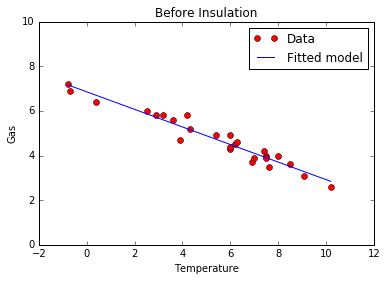

In [22]:
Before = whiteside[whiteside["Insul"] == "Before"]
plt.plot(Before["Temp"], Before["Gas"], 'ro')
plt.plot(Before["Temp"], fitted.fittedvalues, 'b-')
plt.legend(['Data', 'Fitted model'])
plt.ylim(0, 10)
plt.xlim(-2, 12)
plt.xlabel('Temperature')
plt.ylabel('Gas')
plt.title('Before Insulation');

# Fit diagnostiscs

## A look at the residuals

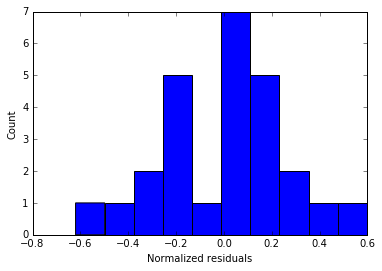

In [23]:
plt.hist(fitted.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals');

## Cooks distance

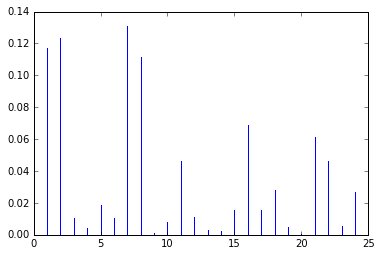

In [24]:
influence = fitted.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",");
# print("distance = {}\np-value = {}".format(c, p))

## Statsmodels builtin plots

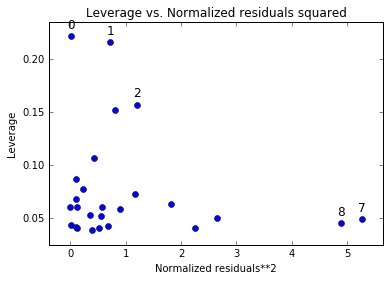

In [25]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(fitted);

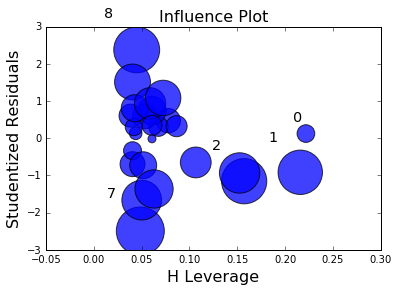

In [26]:
influence_plot(fitted);